<a href="https://colab.research.google.com/github/AryaWiratama26/mlr/blob/main/Multiple_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/life-expectancy-who


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(path + "/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [118]:
df.drop(columns=['Country'], inplace=True)

In [119]:
print("Before")
print(df.isnull().sum())
print("=================================================")
df.dropna(inplace=True)
print("After")
print(df.isnull().sum())

Before
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
After
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant 

In [120]:
print(df.duplicated().sum())

0


In [121]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [122]:
print(df['Status'].unique())
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

['Developing' 'Developed']


In [123]:
# Print the exact column names to inspect them
print(df.columns)

X = df[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
            'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
            'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
            ' thinness  1-19 years', ' thinness 5-9 years',
            'Income composition of resources', 'Schooling', 'Status']]
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [124]:
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[-1.65103874e-02  9.66536611e-02 -1.13165082e-01  4.02568147e-04
 -8.83871509e-03 -6.93120690e-06  2.72791241e-02 -7.30257146e-02
  9.39054245e-03  9.17059292e-02  1.48529518e-02 -4.31475196e-01
 -2.58535260e-06  7.22731807e-10 -4.55542253e-02 -4.42088239e-02
  8.88230172e+00  9.49252830e-01  9.91428166e-01]
53.475442628328466


In [125]:
y_pred = model.predict(X_test)

print("MSE", mean_squared_error(y_test, y_pred))
print("R2", r2_score(y_test, y_pred))

MSE 13.45791185284896
R2 0.8105119533460421


In [126]:
data_manual = {
    'Adult Mortality': [100],
    'infant deaths': [20],
    'Alcohol': [5.0],
    'percentage expenditure': [500.0],
    'Hepatitis B': [90],
    'Measles ': [0],
    ' BMI ': [30.0],
    'under-five deaths ': [25],
    'Polio': [95],
    'Total expenditure': [6.0],
    'Diphtheria ': [92],
    ' HIV/AIDS': [1.0],
    'GDP': [5000.0],
    'Population': [1000000],
    ' thinness  1-19 years': [5.0],
    ' thinness 5-9 years': [5.0],
    'Income composition of resources': [0.7],
    'Schooling': [12.0],
    'Status': [1]
}

df_manual = pd.DataFrame(data_manual)

prediksi_manual = model.predict(df_manual)

print("\nPrediksi Umur Harapan Hidup (Data Manual):", prediksi_manual)




Prediksi Umur Harapan Hidup (Data Manual): [72.10656981]


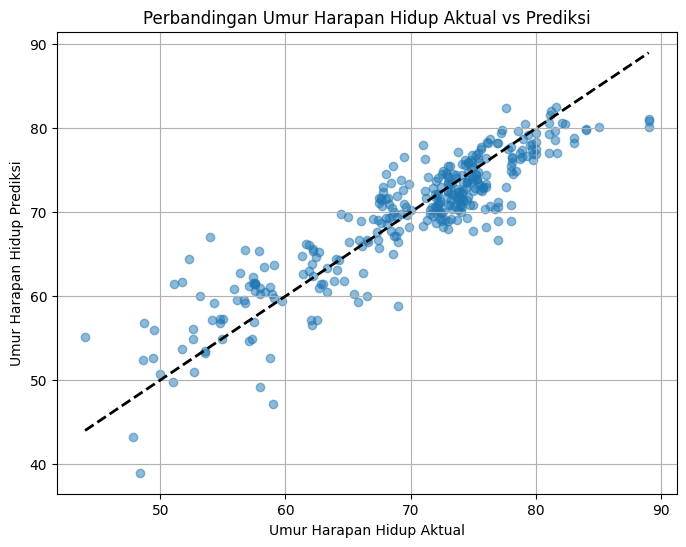

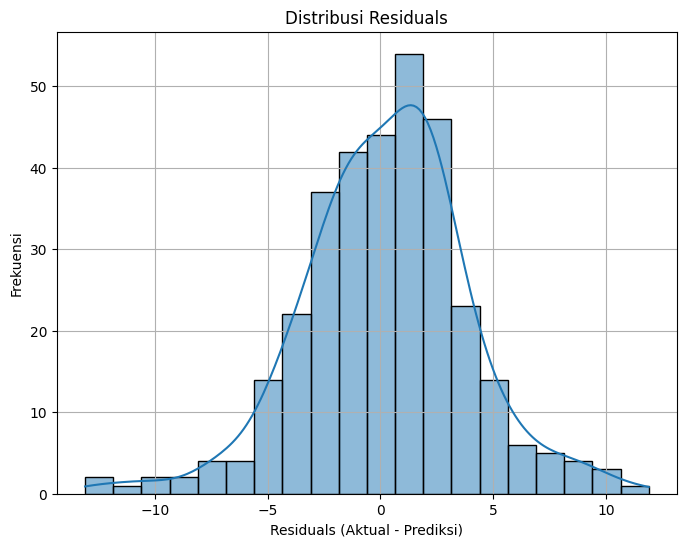

In [127]:
plt.figure(figsize=(8, 6))
# Scatter plot: Nilai Aktual (y_test) di sumbu x vs Nilai Prediksi (y_pred) di sumbu y
plt.scatter(y_test, y_pred, alpha=0.5)
# Menambahkan garis diagonal (y=x) sebagai referensi untuk prediksi sempurna
# 'k--' artinya garis putus-putus hitam
# lw=2 mengatur lebar garis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Menambahkan judul dan label sumbu
plt.xlabel('Umur Harapan Hidup Aktual')
plt.ylabel('Umur Harapan Hidup Prediksi')
plt.title('Perbandingan Umur Harapan Hidup Aktual vs Prediksi')
plt.grid(True) # Menambahkan grid agar lebih mudah dibaca

# Menampilkan plot
plt.show()

# Opsional: Visualisasi Residuals (error)
# Residual = Nilai Aktual - Nilai Prediksi
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True) # Histogram distribusi residuals
plt.title('Distribusi Residuals')
plt.xlabel('Residuals (Aktual - Prediksi)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()
